In [470]:
import numpy as np

In [471]:
import seaborn as sns

In [472]:
import pandas as pd

In [473]:
df=pd.read_csv('240221_new_commodity_view_all_data.csv')

In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183361 entries, 0 to 183360
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   commodity            183361 non-null  object 
 1   parent_commodity     183361 non-null  object 
 2   variety              183361 non-null  object 
 3   state                183361 non-null  object 
 4   district_old         183361 non-null  object 
 5   mandi                183361 non-null  object 
 6   min_price(/Qui)      183361 non-null  int64  
 7   avg_price(/Qui)      183361 non-null  int64  
 8   max_price(/Qui)      183361 non-null  int64  
 9   arrival_date         183361 non-null  object 
 10  source               183361 non-null  object 
 11  Average_Humidity     183361 non-null  float64
 12  Average_Temperature  183361 non-null  float64
 13  rain_2m              183361 non-null  float64
 14  district_new         183361 non-null  object 
dtypes: float64(3), in

In [475]:
df.isnull().sum()

commodity              0
parent_commodity       0
variety                0
state                  0
district_old           0
mandi                  0
min_price(/Qui)        0
avg_price(/Qui)        0
max_price(/Qui)        0
arrival_date           0
source                 0
Average_Humidity       0
Average_Temperature    0
rain_2m                0
district_new           0
dtype: int64

In [476]:
df = df[df['min_price(/Qui)'] >= 10]
df = df[df['min_price(/Qui)'] <= 10000]

In [477]:
df.shape

(127047, 15)

In [478]:
df.columns

Index(['commodity', 'parent_commodity', 'variety', 'state', 'district_old',
       'mandi', 'min_price(/Qui)', 'avg_price(/Qui)', 'max_price(/Qui)',
       'arrival_date', 'source', 'Average_Humidity', 'Average_Temperature',
       'rain_2m', 'district_new'],
      dtype='object')

In [479]:
data=df.copy()

In [480]:
data.columns

Index(['commodity', 'parent_commodity', 'variety', 'state', 'district_old',
       'mandi', 'min_price(/Qui)', 'avg_price(/Qui)', 'max_price(/Qui)',
       'arrival_date', 'source', 'Average_Humidity', 'Average_Temperature',
       'rain_2m', 'district_new'],
      dtype='object')

In [481]:
columns_to_drop = ['parent_commodity','variety','source','district_old','min_price(/Qui)','max_price(/Qui)']
data = data.drop(columns=columns_to_drop)
output_file_path = 'output_file1.csv'


In [482]:
data.shape

(127047, 9)

In [483]:
data.rename(columns={'avg_price(/Qui)': 'average'}, inplace=True)
data.rename(columns={'arrival_date': 'date'}, inplace=True)

In [484]:
data.head(5)

commodity       state         mandi  average        date  \
1  coriander  whole  tamil nadu  srivaikundam     5000  2023-09-04   
3  coriander  whole  tamil nadu  srivaikundam     5500  2023-10-13   
4  coriander  whole  tamil nadu  srivaikundam     5000  2023-10-18   
5            tomato  tamil nadu  srivaikundam     1000  2023-10-19   
6  coriander  whole  tamil nadu  srivaikundam     8000  2023-11-29   

   Average_Humidity  Average_Temperature    rain_2m district_new  
1         64.282316            29.454834  64.282316  thoothukudi  
3         71.237594            28.650667  71.237594  thoothukudi  
4         84.001985            26.590250  84.001985  thoothukudi  
5         78.484102            27.279833  78.484102  thoothukudi  
6         85.138867            25.886084  85.138867  thoothukudi

In [485]:
data['date'][28]

'2019-04-18'

In [486]:
str=data['date'][1]
str2=str.split('-')
print(str)
print(str2)
print(str2[1])


2023-09-04
['2023', '09', '04']
09


In [487]:

Dict = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}




In [488]:
Dict[1]

'January'

In [489]:
month_column=[]

In [490]:
for rr in data['date']:
    str=rr
    str2=str.split('-')
    month_column.append(Dict[int(str2[1])])

In [491]:
len(month_column)

127047

In [492]:
data['month_column']=month_column

In [493]:
data['month_column']

1         September
3           October
4           October
5           October
6          November
            ...    
183356     December
183357     December
183358      January
183359     February
183360     February
Name: month_column, Length: 127047, dtype: object

In [494]:
data['month_column'].unique()

array(['September', 'October', 'November', 'December', 'February', 'July',
       'January', 'March', 'April', 'May', 'June', 'August'], dtype=object)

In [495]:
season_names=[]

In [496]:
for tt in data["month_column"]:
    if tt=="January" or tt=="February":
        season_names.append('winter')
    elif tt=="March" or tt=="April":
        season_names.append('spring')
    elif tt=="May" or tt=="June":
        season_names.append('summer')
    elif tt=="July" or tt=="August":
        season_names.append('monsoon')
    elif tt=="September" or tt=="October":
        season_names.append('autumn')
    elif tt=="November" or tt=="December":
        season_names.append('pre winter')

In [497]:
data['season_names']=season_names

In [498]:
import pandas as pd
df=pd.Timestamp('2019-04-12')
print(df.dayofweek)

4


In [499]:
day_of_week=[]

In [500]:
for rr in data['date']:
    df=pd.Timestamp(rr)
    day=df.dayofweek
    day_of_week.append(day)
    

In [501]:
day_of_week

[0,
 4,
 2,
 3,
 2,
 0,
 1,
 2,
 3,
 2,
 0,
 1,
 0,
 1,
 1,
 4,
 0,
 4,
 2,
 5,
 1,
 4,
 5,
 2,
 1,
 3,
 4,
 2,
 3,
 4,
 1,
 1,
 2,
 2,
 3,
 3,
 4,
 4,
 5,
 5,
 5,
 0,
 0,
 1,
 2,
 4,
 4,
 5,
 0,
 0,
 1,
 1,
 2,
 3,
 5,
 5,
 5,
 0,
 0,
 2,
 2,
 3,
 3,
 4,
 5,
 5,
 0,
 0,
 1,
 1,
 2,
 3,
 3,
 4,
 4,
 5,
 0,
 0,
 1,
 1,
 2,
 4,
 5,
 0,
 0,
 1,
 3,
 3,
 5,
 0,
 2,
 1,
 1,
 2,
 3,
 4,
 4,
 5,
 5,
 0,
 0,
 1,
 2,
 3,
 5,
 0,
 0,
 1,
 2,
 2,
 4,
 4,
 2,
 2,
 3,
 3,
 3,
 2,
 3,
 0,
 1,
 1,
 3,
 3,
 4,
 5,
 6,
 2,
 3,
 5,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 4,
 4,
 4,
 5,
 5,
 5,
 0,
 0,
 2,
 2,
 2,
 3,
 3,
 3,
 5,
 5,
 0,
 0,
 4,
 4,
 5,
 0,
 0,
 1,
 3,
 3,
 3,
 5,
 2,
 2,
 2,
 4,
 5,
 5,
 6,
 4,
 4,
 4,
 5,
 5,
 1,
 1,
 2,
 2,
 4,
 5,
 6,
 0,
 0,
 2,
 2,
 3,
 5,
 6,
 6,
 2,
 2,
 2,
 4,
 4,
 5,
 4,
 4,
 5,
 5,
 6,
 6,
 6,
 0,
 0,
 0,
 1,
 3,
 3,
 4,
 4,
 5,
 5,
 0,
 0,
 1,
 1,
 3,
 3,
 4,
 0,
 0,
 0,
 4,
 4,
 5,
 5,
 0,
 0,
 1,
 2,
 4,
 0,
 0,
 3,
 4,
 5,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 2,
 4,


In [502]:
data['day_of_week']=day_of_week

In [503]:
data.head(5)

commodity       state         mandi  average        date  \
1  coriander  whole  tamil nadu  srivaikundam     5000  2023-09-04   
3  coriander  whole  tamil nadu  srivaikundam     5500  2023-10-13   
4  coriander  whole  tamil nadu  srivaikundam     5000  2023-10-18   
5            tomato  tamil nadu  srivaikundam     1000  2023-10-19   
6  coriander  whole  tamil nadu  srivaikundam     8000  2023-11-29   

   Average_Humidity  Average_Temperature    rain_2m district_new month_column  \
1         64.282316            29.454834  64.282316  thoothukudi    September   
3         71.237594            28.650667  71.237594  thoothukudi      October   
4         84.001985            26.590250  84.001985  thoothukudi      October   
5         78.484102            27.279833  78.484102  thoothukudi      October   
6         85.138867            25.886084  85.138867  thoothukudi     November   

  season_names  day_of_week  
1       autumn            0  
3       autumn            4  
4       autumn            2  
5       autumn            3  
6   pre winter            2

In [504]:
# Q1 = data['average'].quantile(0.25)
# Q3 = data['average'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the acceptable range (you can adjust this based on your criteria)
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Filter the DataFrame to remove outliers
# filtered_df = data[(data['average'] >= lower_bound) & (data['average'] <= upper_bound)]

In [505]:
# data=filtered_df.copy()

<Axes: xlabel='average'>

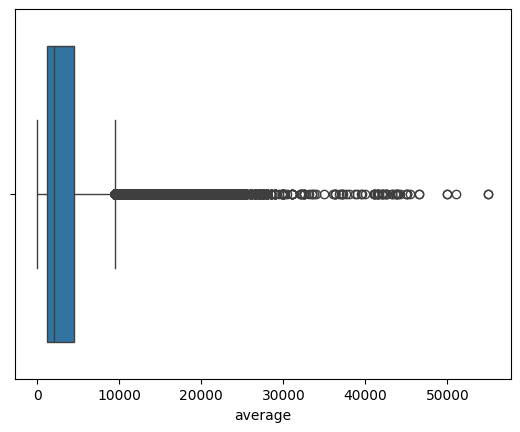

In [506]:
import seaborn as sns
sns.boxplot(x=data['average'])

In [507]:
df=data.copy()

In [508]:
# import plotly.express as px
# import matplotlib.pyplot as plt

In [509]:
# plt.figure(figsize=(14,10))
# sns.relplot(data=df,x="state",y="average",hue="season_names",kind="line",height=6,aspect=2)
# plt.xticks(rotation=45,ha='right')

In [510]:
# plt.figure(figsize=(14, 10))
# ax = sns.relplot(data=df, x="state", y="average", hue="season_names", kind="line", height=6, aspect=2)

# for line in ax.ax.lines:
#     x_data = line.get_xdata()
#     y_data = line.get_ydata()
#     for i, (x, y) in enumerate(zip(x_data, y_data)):
#         ax.ax.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color=line.get_color())

# plt.xticks(rotation=45, ha='right')

# # Show the plot
# plt.show()

In [511]:
# df.to_csv('calculated.csv')

In [512]:
# df.head(5)

In [513]:
# sns.relplot(data=df,x='day_of_week',y='average',hue='season_names',kind='line')

In [514]:
# sns.relplot(data=df,x='mandi',y='average',hue='season_names',kind='line' ,height=4 , aspect=4)
# plt.xticks(rotation='vertical')


In [515]:
# plt.figure(figsize=(14,10))

# sns.relplot(data=df,x="month_column",y="average",hue="season_names",kind="line",height=6,aspect=2)
# plt.xticks(rotation=45,ha='right')

In [516]:
# plt.figure(figsize=(14,10))

# sns.relplot(data=df,x="date",y="average",hue="season_names",kind="line",height=6,aspect=2)
# plt.xticks(rotation=45,ha='right')

In [517]:
# df.head(5)

In [518]:
dist=(data['commodity'])
distset=set(dist)
dd=list(distset)
dictOfWords={dd[i]: i for i in range(0,len(dd))}
data['commodity']=data['commodity'].map(dictOfWords)

In [519]:
dist=(data['state'])
distset=set(dist)
dd=list(distset)
dictOfWords={dd[i]: i for i in range(0,len(dd))}
data['state']=data['state'].map(dictOfWords)

In [520]:
dist=(data['district_new'])
distset=set(dist)
dd=list(distset)
dictOfWords={dd[i]: i for i in range(0,len(dd))}
data['district_new']=data['district_new'].map(dictOfWords)

In [521]:
dist=(data['mandi'])
distset=set(dist)
dd=list(distset)
dictOfWords={dd[i]: i for i in range(0,len(dd))}
data['mandi']=data['mandi'].map(dictOfWords)

In [522]:
dist=(data['month_column'])
distset=set(dist)
dd=list(distset)
dictOfWords={dd[i]: i for i in range(0,len(dd))}
data['month_column']=data['month_column'].map(dictOfWords)

In [523]:
dist=(data['season_names'])
distset=set(dist)
dd=list(distset)
dictOfWords={dd[i]: i for i in range(0,len(dd))}
data['season_names']=data['season_names'].map(dictOfWords)

In [524]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127047 entries, 1 to 183360
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   commodity            127047 non-null  int64  
 1   state                127047 non-null  int64  
 2   mandi                127047 non-null  int64  
 3   average              127047 non-null  int64  
 4   date                 127047 non-null  object 
 5   Average_Humidity     127047 non-null  float64
 6   Average_Temperature  127047 non-null  float64
 7   rain_2m              127047 non-null  float64
 8   district_new         127047 non-null  int64  
 9   month_column         127047 non-null  int64  
 10  season_names         127047 non-null  int64  
 11  day_of_week          127047 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 16.6+ MB


In [525]:
columns_to_drop = ['date']
data = data.drop(columns=columns_to_drop)

In [526]:
data.head(5)

commodity  state  mandi  average  Average_Humidity  Average_Temperature  \
1         56     27   1069     5000         64.282316            29.454834   
3         56     27   1069     5500         71.237594            28.650667   
4         56     27   1069     5000         84.001985            26.590250   
5         46     27   1069     1000         78.484102            27.279833   
6         56     27   1069     8000         85.138867            25.886084   

     rain_2m  district_new  month_column  season_names  day_of_week  
1  64.282316           281             0             1            0  
3  71.237594           281             1             1            4  
4  84.001985           281             1             1            2  
5  78.484102           281             1             1            3  
6  85.138867           281             8             0            2

In [527]:
import matplotlib.pyplot as plt

<Axes: >

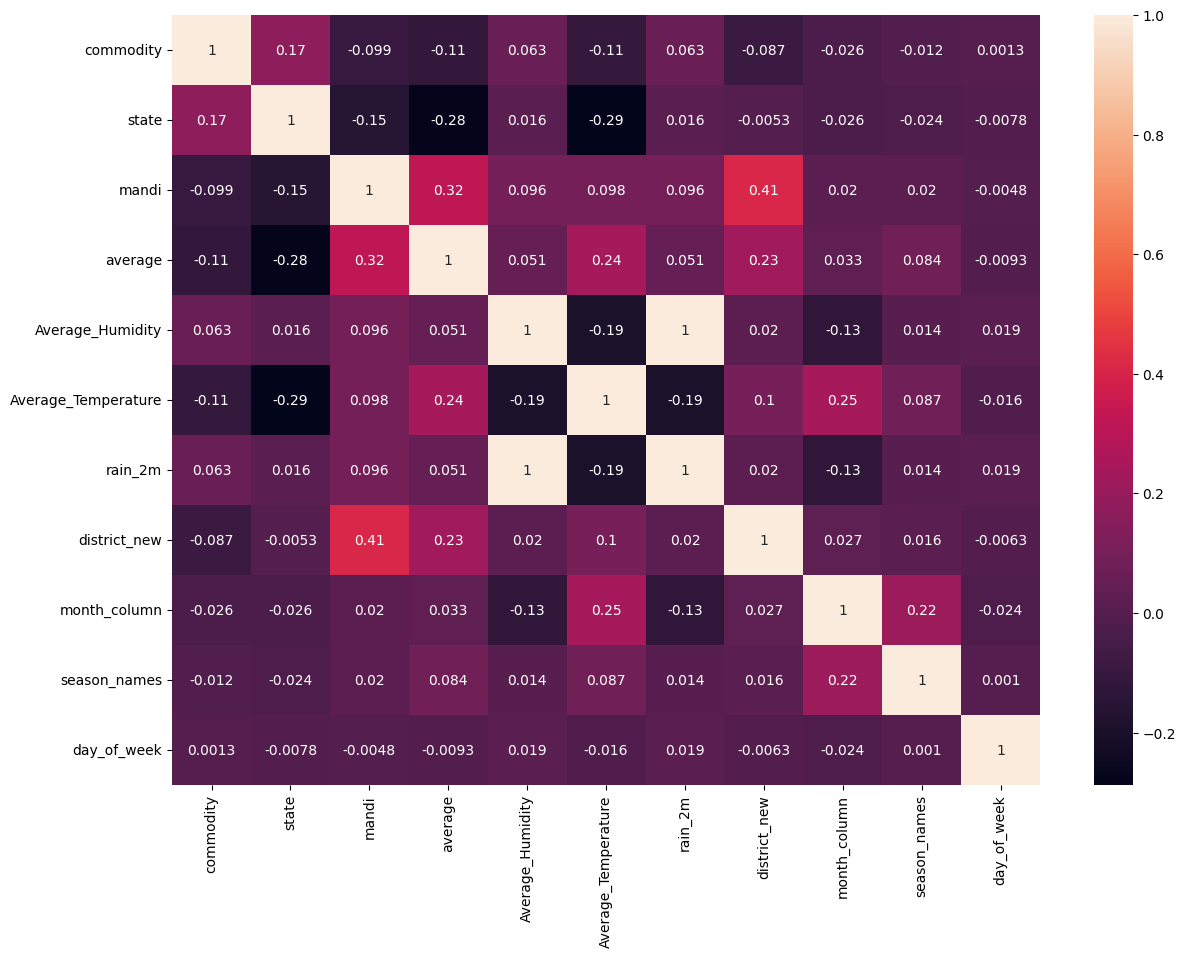

In [528]:
plt.figure(figsize=(14,10))


sns.heatmap(data.corr(),annot=True)


In [529]:
data.head(5)

commodity  state  mandi  average  Average_Humidity  Average_Temperature  \
1         56     27   1069     5000         64.282316            29.454834   
3         56     27   1069     5500         71.237594            28.650667   
4         56     27   1069     5000         84.001985            26.590250   
5         46     27   1069     1000         78.484102            27.279833   
6         56     27   1069     8000         85.138867            25.886084   

     rain_2m  district_new  month_column  season_names  day_of_week  
1  64.282316           281             0             1            0  
3  71.237594           281             1             1            4  
4  84.001985           281             1             1            2  
5  78.484102           281             1             1            3  
6  85.138867           281             8             0            2

In [530]:
features=data[['commodity',	'state','district_new',	'mandi','month_column',	'season_names',	'day_of_week','Average_Temperature']]

label=data['average']


In [531]:
# Decison tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  # Import DecisionTreeRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics

In [532]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,label,test_size=0.2,random_state=42)

In [533]:
regr = DecisionTreeRegressor(max_depth=1000, random_state=0)
regr.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=1000, random_state=0)

In [534]:
xtest[0:1]

commodity  state  district_new  mandi  month_column  season_names  \
1091          1      4           206    488             2             4   

      day_of_week  Average_Temperature  
1091            1            25.238417

In [535]:
y_pred_decison=regr.predict(xtest)

In [536]:
from sklearn.metrics import r2_score

In [537]:
r2_score(ytest,y_pred_decison)

0.663663188743193

In [538]:
y_pred

array([3800.  , 8094.5 , 6240.4 , ..., 1119.5 , 2198.3 ,  981.09])

In [539]:
data.columns

Index(['commodity', 'state', 'mandi', 'average', 'Average_Humidity',
       'Average_Temperature', 'rain_2m', 'district_new', 'month_column',
       'season_names', 'day_of_week'],
      dtype='object')

In [540]:
user_input=[[19,18,200,1278,8,5,2]]


In [541]:
data.to_csv('main_after_running_model_with_removing_zero_row.csv')

In [542]:
# random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr=RandomForestRegressor(max_depth=1000,random_state=0)
regr.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=1000, random_state=0)

In [543]:
xtest[0:1]

commodity  state  district_new  mandi  month_column  season_names  \
1091          1      4           206    488             2             4   

      day_of_week  Average_Temperature  
1091            1            25.238417

In [544]:
y_pred_random=regr.predict(xtest)

In [545]:
from sklearn.metrics import r2_score

In [546]:
r2_score(ytest,y_pred_random)

0.7901433662709441

In [547]:
# multiple linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain,ytrain)

LinearRegression()

In [548]:
y_pred_linear=regressor.predict(xtest)

In [549]:
from sklearn.metrics import r2_score

In [550]:
r2_score(ytest,y_pred_linear)

0.19462322157855827

In [551]:
import xgboost as xgb

# Define and train the XGBoost regressor
xgb_regr = xgb.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, random_state=0)
xgb_regr.fit(xtrain, ytrain)

# Predict using the trained model
y_pred_xgb = xgb_regr.predict(xtest)


In [552]:
from sklearn.metrics import r2_score

In [553]:
r2_score(ytest,y_pred_xgb)

0.7044334797925771

In [554]:
import lightgbm as lgb

# Define and train the LightGBM regressor
lgb_regr = lgb.LGBMRegressor(
    max_depth=5,        # You might want to adjust max_depth as well
    num_leaves=20,      # Adjust num_leaves based on your data size and complexity
    learning_rate=0.1,
    n_estimators=100,
    random_state=0
)
lgb_regr.fit(xtrain, ytrain)

# Predict using the trained model
y_pred_lgb = lgb_regr.predict(xtest)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 101637, number of used features: 8
[LightGBM] [Info] Start training from score 3835.440204
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [555]:
r2_score(ytest,y_pred_lgb)

0.7625966475042154

In [556]:
# SVR Model

In [557]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR  # Import SVR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics

xtrain, xtest, ytrain, ytest = train_test_split(features, label, test_size=0.2, random_state=2)

regr = SVR(kernel='linear')  
regr.fit(xtrain, ytrain)


SVR(kernel='linear')

In [558]:
y_pred_svr = regr.predict(xtest)

In [559]:
from sklearn.metrics import r2_score

In [560]:
r2_score(ytest,y_pred_svr)

0.027647827818813364

In [576]:
X_meta = np.column_stack((y_pred_xgb,y_pred_lgb))

In [577]:
meta_model = LinearRegression()
meta_model.fit(X_meta, ytest)

LinearRegression()

In [578]:
final_predictions = meta_model.predict(X_meta)

In [579]:
r2_score(ytest,final_predictions)

4.9538692478479085e-05